In [11]:
import cv2                         
import numpy as np                 
import matplotlib.pyplot as plt    

In [47]:
src_img = cv2.imread("/home/vitor/Downloads/amazon.jpg")

In [48]:
def show_image(img, title, colorspace):
    dpi = 96
    figsize = (img.shape[1] / dpi, img.shape[0] / dpi)
    fig, ax = plt.subplots(figsize = figsize, dpi = dpi)
    if colorspace == 'RGB':
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation = 'spline16')
    if colorspace == 'gray':
        plt.imshow(img, cmap = 'gray')
    plt.title(title, fontsize = 12)
    ax.axis('off')
    plt.show()    

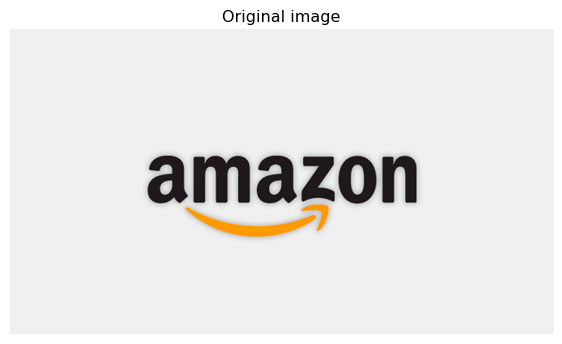

In [49]:
show_image(src_img, 'Original image', 'RGB')

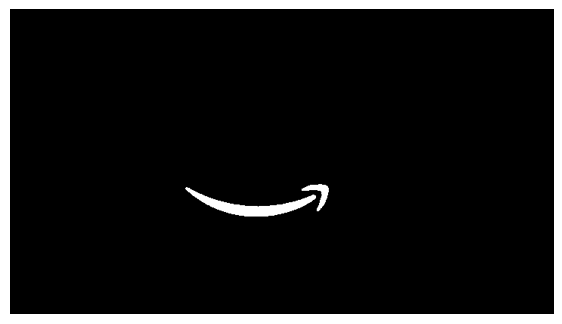

In [50]:
src_img_hsv = cv2.cvtColor(src_img, cv2.COLOR_BGR2HSV)
yellow_lower = np.array([16, 100, 100])
yellow_upper = np.array([45, 255, 255])

mask = cv2.inRange(src_img_hsv, yellow_lower, yellow_upper)

show_image(mask, '', 'RGB')

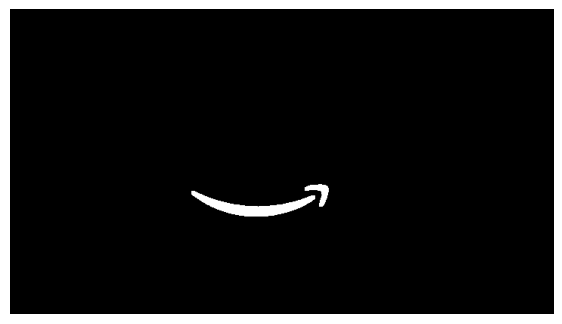

In [51]:
kernel = np.ones((5, 5), np.uint8)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

show_image(opening, '', 'gray')

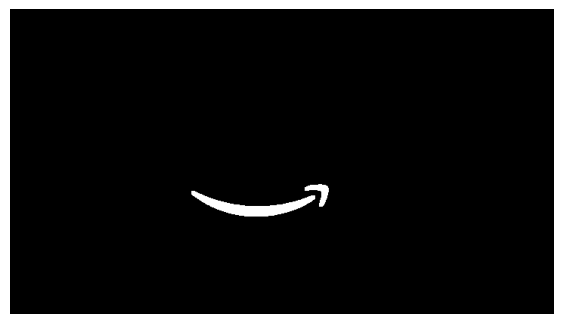

In [52]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
show_image(closing, '', 'gray')

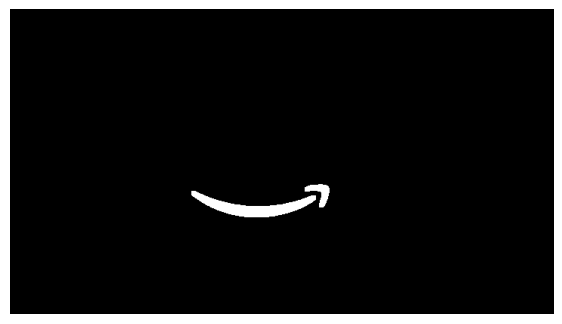

In [53]:
kernel1 = np.ones((2, 2), np.uint8)
dilation = cv2.dilate(closing, kernel1, iterations = 1)
show_image(dilation, '', 'gray')

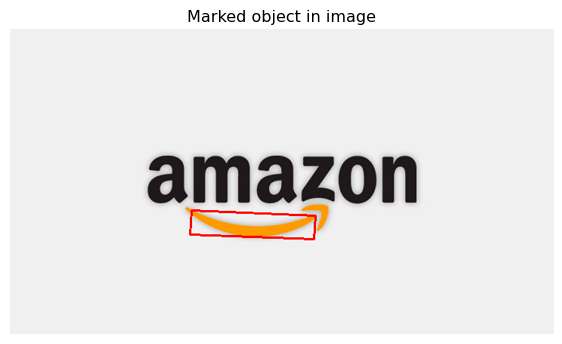

In [54]:
contours, _ = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


box = cv2.boxPoints(cv2.minAreaRect(max(contours, key = cv2.contourArea)))
box = np.int0(box)

temp_img = src_img.copy()
bdg_rect = cv2.drawContours(temp_img, [box], 0, (0, 0, 255), 2)

show_image(bdg_rect, 'Marked object in image', 'RGB')

In [55]:
if True:
    width = box[0][0] - box[1][0]
    height = box[1][1] - box[2][1]

    src_pts = box.astype('float32')
    dst_pts = np.array([[width, height],
                        [0, height],
                        [0, 0],
                        [width, 0]], dtype = 'float32')

    query_img = cv2.warpPerspective(src_img, cv2.getPerspectiveTransform(src_pts, dst_pts), (width, height))

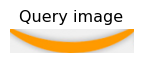

In [56]:
show_image(query_img, 'Query image', 'RGB')

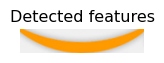

In [57]:
orb = cv2.ORB_create()

f_img = cv2.drawKeypoints(query_img, orb.detect(query_img, None), None, color = (0, 255, 0), flags = 0)

show_image(f_img, 'Detected features', 'RGB')